**Feature Engineering**


*TO-DO LIST*
1. Text cleaning (Tags and Discription)
2. Sentiment analysis using NLP techniques
3. Text statistics
4. One-Hot Encoding for popular genres

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import ast
from collections import Counter

In [101]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

from src import config
RAW_DATA_PATH = config.RAW_DATA_PATH
PROCESSED_DATA_PATH = config.PROCESSED_DATA_PATH

In [83]:
df = pd.read_csv(RAW_DATA_PATH)
print(f"Raw data shape: {df.shape}")

Raw data shape: (70948, 6)


In [84]:
df.loc[df["description"] == "This entry currently doesn't have a synopsis. Check back soon!", "description"] = np.nan

In [85]:
df["description"] = df["description"].fillna("")
df["tags"] = df["tags"].fillna("")

In [86]:
def clean_tags(x):
    if isinstance(x, list):
        return [t.strip().lower() for t in x]

    if isinstance(x, str):
        x = x.strip()
        if x.startswith("[") and x.endswith("]"):
            try:
                tags = ast.literal_eval(x)
                return [t.strip().lower() for t in tags]
            except:
                return None
        else:
            return None

    return None


In [87]:
df["tags"] = df["tags"].apply(clean_tags)

In [97]:
df["desc_char_len"] = df["description"].str.len()
df["desc_word_count"] = df["description"].apply(lambda x: len(x.split()))

In [89]:
def calculate_sentiment(description):
    """Calculates sentiment polarity of a given description."""
    if pd.isna(description):
        return 0.0
    analysis = TextBlob(description)
    return analysis.sentiment.polarity

In [90]:
df["sentiment_score"] = df["description"].apply(calculate_sentiment)

In [91]:
df["tag_count"] = df["tags"].apply(len)

In [92]:
target_genres = ["Romance", "Comedy", "Drama", "Fantasy", "Action", "School Life", "Seinen", "Shoujo", "Shounen", "Josei"]
target_comic_types = ["Manga", "Webtoon", "Manhua", "Manhwa"]

In [93]:
for genre in target_genres:
    search_term = genre.lower()
    df[f"is_{genre}"] = df["tags"].apply(lambda x: 1 if search_term in str(x).lower() else 0)

for type in target_comic_types:
    search_term = type.lower()
    df[f"is_{type}"] = df["tags"].apply(lambda x: 1 if search_term in str(x).lower() else 0)

In [94]:
current_year = pd.Timestamp.now().year

df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(current_year).astype(int)
df['age'] = current_year - df['year']

In [95]:
hatali_sutun = "is_['Manga', 'Webtoon', 'Manhua', 'Manhwa']"
df = df.drop(columns=[hatali_sutun], errors='ignore')

In [99]:
correlation_matrix = df.corr(numeric_only=True)

**CORRELATION MATRIX**

Text(0.5, 1.0, 'Feature Correlation Matrix')

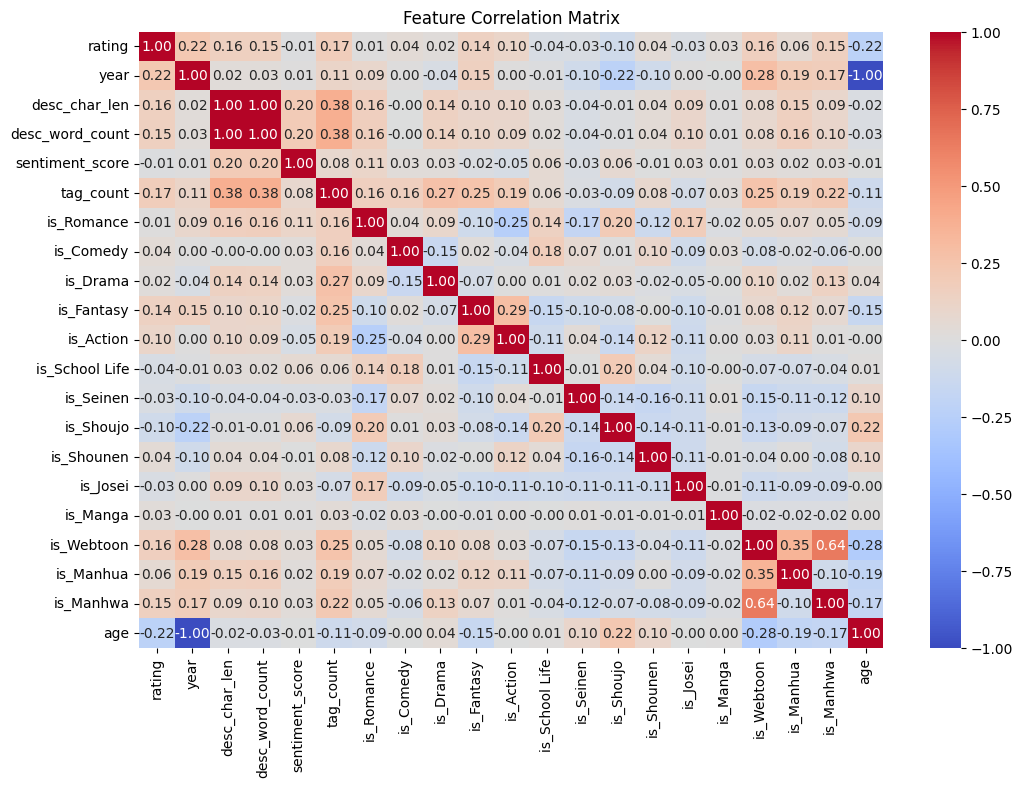

In [100]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")

In [102]:
output_df = df.copy()
output_df.to_csv(PROCESSED_DATA_PATH)